In [35]:
import numpy as np 
import pandas as pd 
import sqldf
import matplotlib.pyplot as plt 
import seaborn as sns 

In [36]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
df.shape

(891, 12)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [41]:
df['M'] = df['Sex'] == 'male'
mask= df['M']
print(f'es el numero  total de hombres',mask.sum())


es el numero  total de hombres 577


In [42]:
df['F'] = df['Sex'] == 'female'
mask_f = df['F']
print(f'es el numero total de mujeres',mask_f.sum())

es el numero total de mujeres 314


UNIVARIATE VARIABLE ANALYSIS

In [43]:
#Código Jorge 
df_sex = df['Sex'].value_counts()
df_sex




male      577
female    314
Name: Sex, dtype: int64

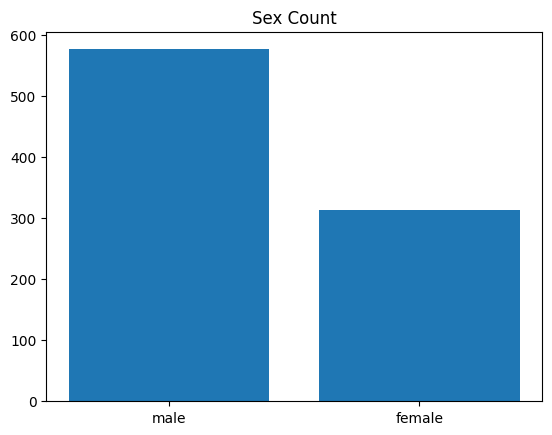

In [44]:
plt.bar( df_sex.index, df_sex.values)
plt.title('Sex Count')
plt.show()

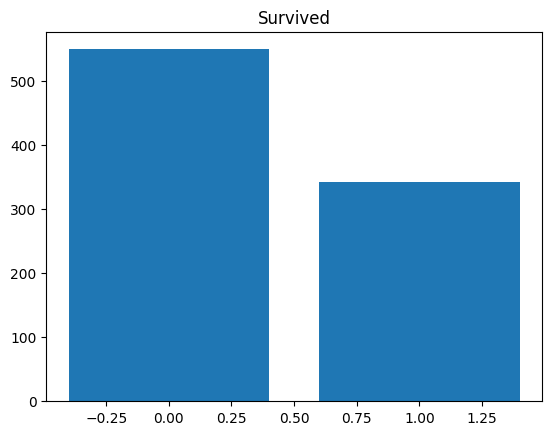

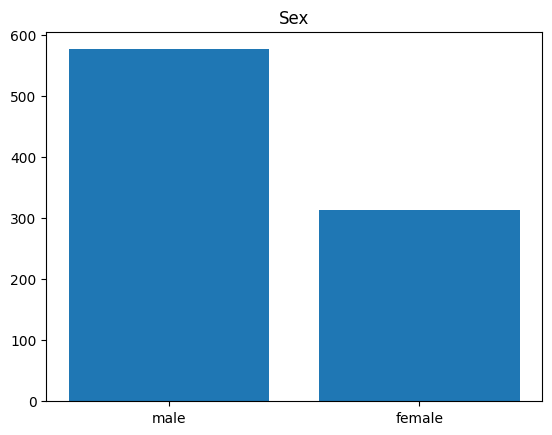

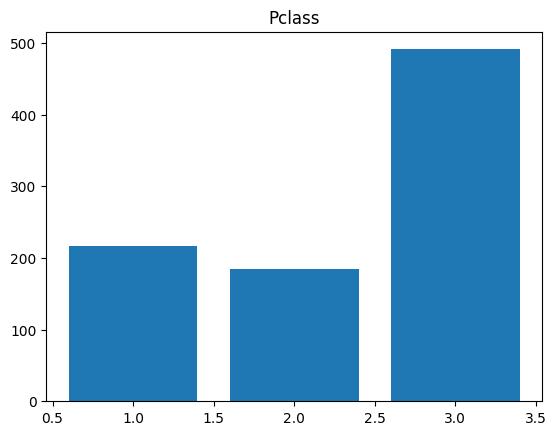

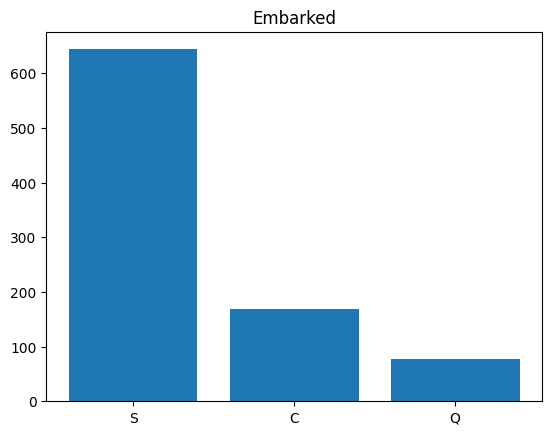

In [45]:
for col in ['Survived', 'Sex', 'Pclass', 'Embarked']:

    df_sex = df[col].value_counts()

    plt.bar(df_sex.index, df_sex.values)
    plt.title(col)
    plt.show()

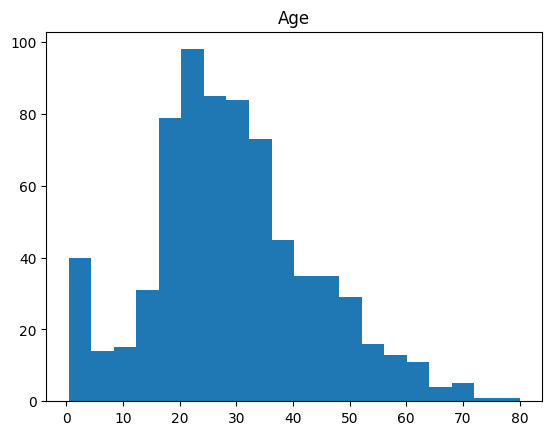

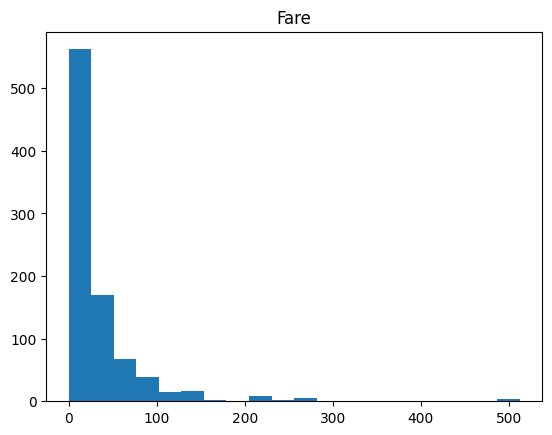

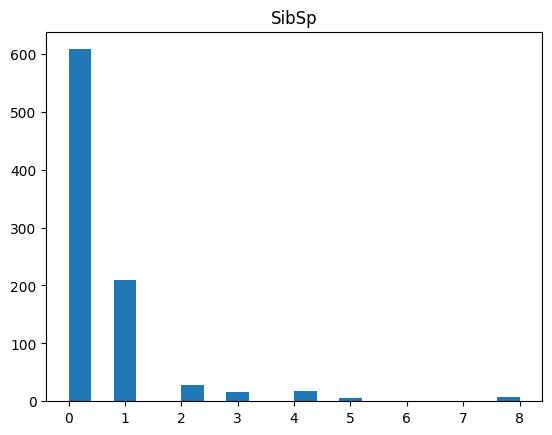

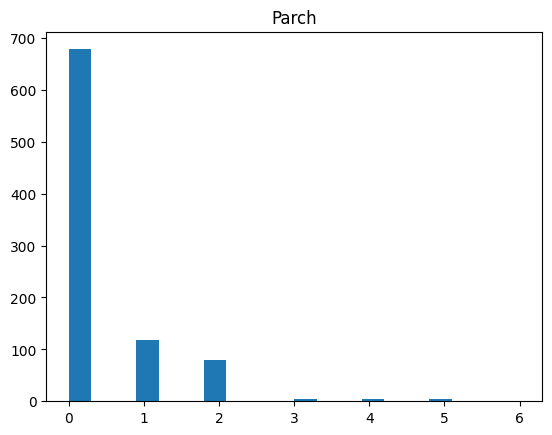

In [46]:
for col in ['Age', 'Fare', 'SibSp', 'Parch']:

    #df_sex = df[col].value_counts()

    plt.hist(df[col], bins=20)
    plt.title(col)
    plt.show()

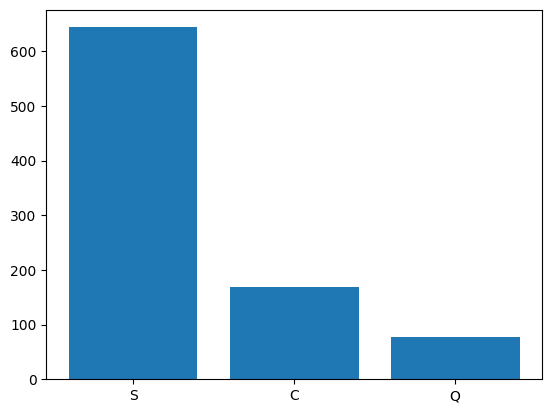

In [47]:
#Código Jorge 
for col in ['Survived', 'Sex', 'Pclass', 'Embarked']:
    df_sex =df[col].value_counts()
plt.bar( df_sex.index, df_sex.values)
plt.show()
    

In [48]:
#Código Jorge 
for col in ['Survived', 'Sex', 'Pclass', 'Embarked']:
    df_sex = df[col].value_counts()
    


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


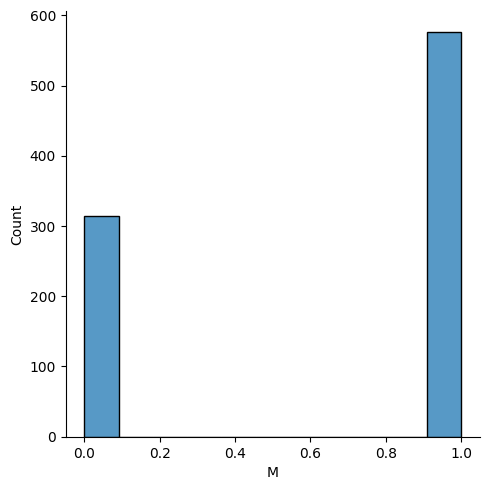

In [49]:
sns.displot(mask);

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


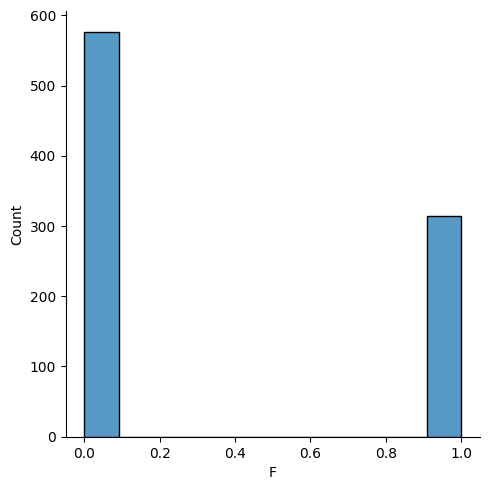

In [50]:
sns.displot(mask_f);

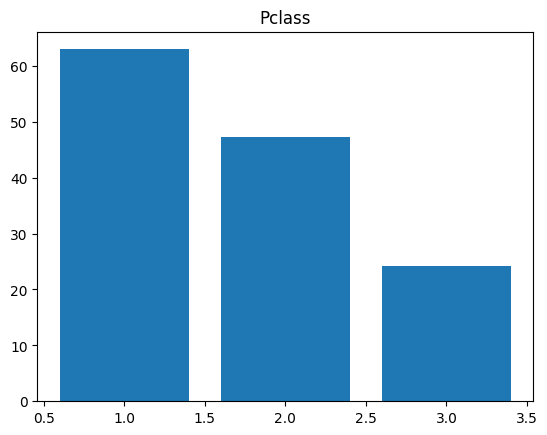

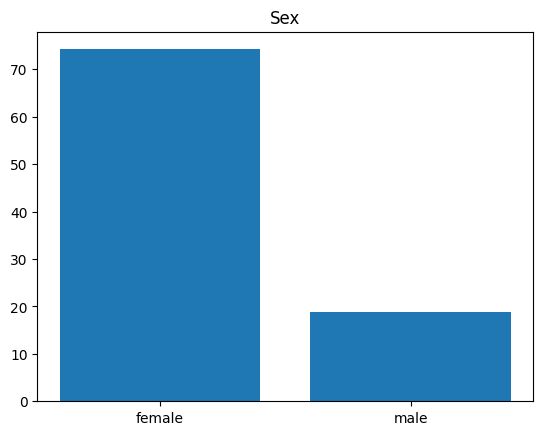

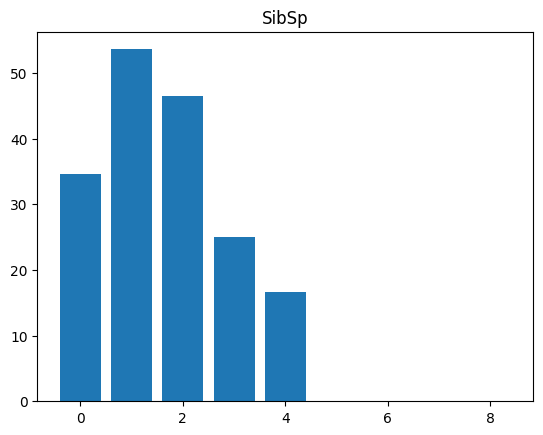

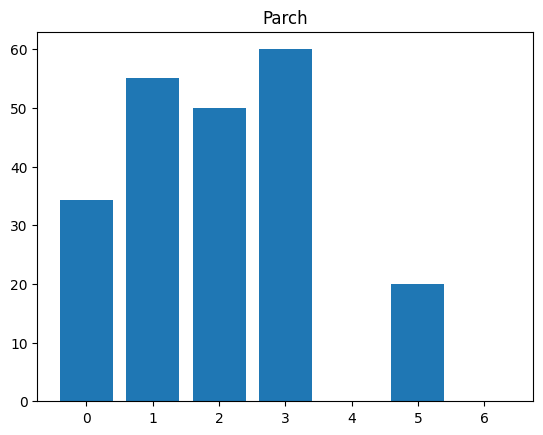

In [51]:
for col in ['Pclass', 'Sex', 'SibSp', 'Parch']:
    df_gr = df[[col, "Survived"]].groupby([col], as_index= False).mean().sort_values([col])
    plt.bar(df_gr[col], df_gr['Survived']*100)
    plt.title(col)
    plt.show()

In [52]:
#Código Jorge 
df[['Sex','Survived']].groupby(['Sex'],as_index = False).mean().sort_values(by='Survived')

,Sex,Survived
1,male,0.188908
0,female,0.742038


In [53]:
df[['Pclass','Survived']].groupby(['Pclass'],as_index = False).mean().sort_values(by='Survived')

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


In [54]:
mask = df['Survived']
mask

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

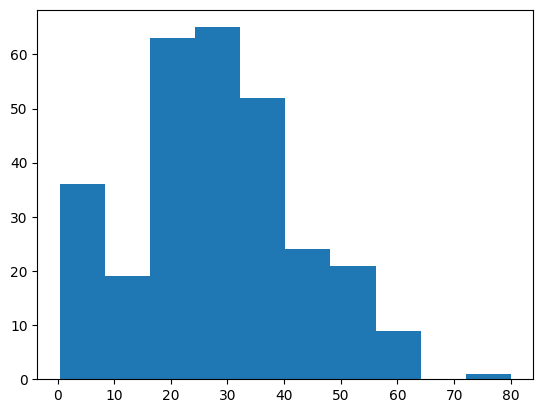

In [55]:
mask = df['Survived'] == 1
df_d = df[mask]


plt.hist(df_d['Age']);


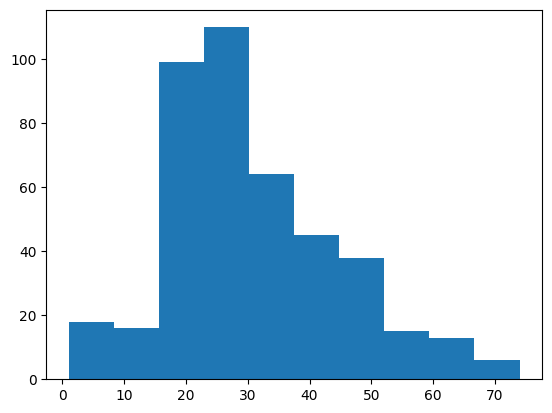

In [56]:
mask = df['Survived'] == 0
df_s = df[mask]


plt.hist(df_s['Age']);


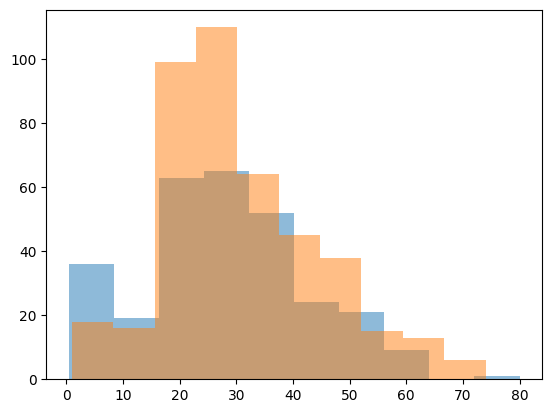

In [57]:
mask = df['Survived'] == 0
df_s = df[mask]
mask = df['Survived'] == 1
df_d = df[mask]


plt.hist(df_d['Age'],alpha = 0.5);

plt.hist(df_s['Age'],alpha = 0.5);

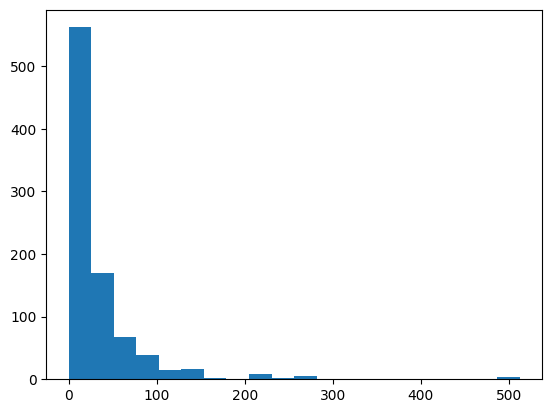

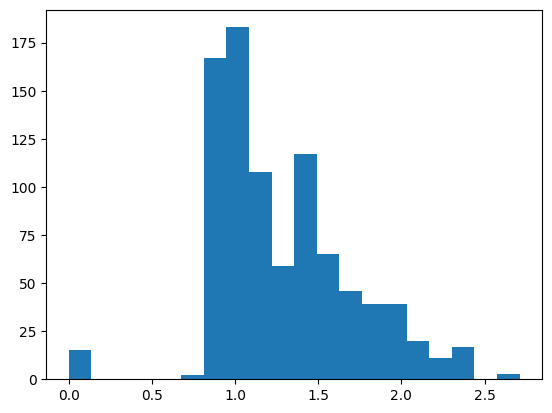

In [58]:
df['Fare_log'] = np.log10(df['Fare'] + 1)
plt.hist(df['Fare'],bins=20);
plt.show()

plt.hist(df['Fare_log'],bins=20)
plt.show()

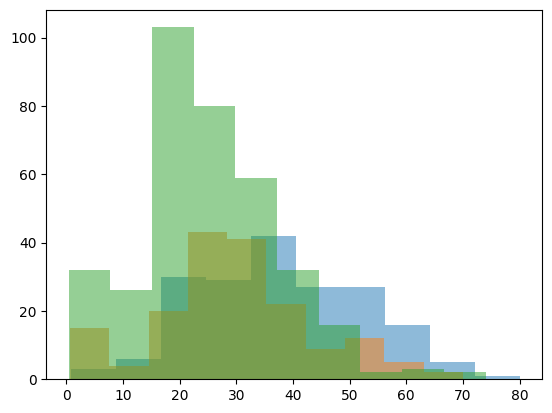

In [59]:
df_1 = df[df['Pclass'] == 1]
df_2 = df[df['Pclass'] == 2]
df_3 = df[df['Pclass'] == 3]





plt.hist(df_1['Age'],alpha = 0.5);
plt.hist(df_2['Age'],alpha = 0.5);
plt.hist(df_3['Age'],alpha = 0.5);

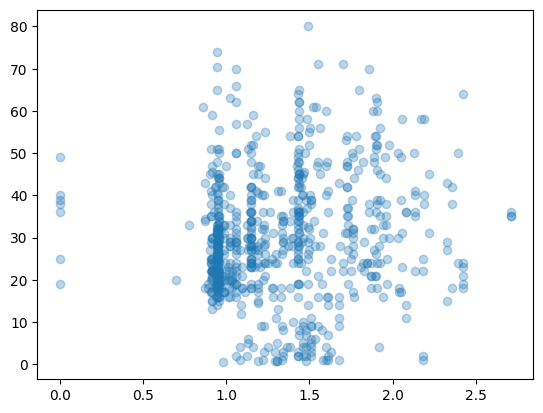

In [60]:
plt.scatter(df['Fare_log'],df['Age'],alpha=0.3);

ONE-HOT-ENCODING

In [61]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [62]:
df = pd.get_dummies(df,columns=['Embarked'])
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,M,F,Fare_log,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,True,False,0.916454,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,False,True,1.859038,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True,0.950608,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,True,1.733197,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,True,False,0.956649,0,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,True,False,0.975813,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,True,False,1.723148,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,True,False,1.343901,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,False,True,1.083979,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,False,True,1.492352,1,0,0


In [63]:
df = pd.get_dummies(df,columns=['Embarked'],dummy_na= True)
df.head(10)

KeyError: "None of [Index(['Embarked'], dtype='object')] are in the [columns]"

OUTLIER

In [64]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 3
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)

FIND MISSING VALUE

In [65]:
df['Title'] = df['Name'].str.split(',',expand=True)[1].str.split('.',expand=True)[0]
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,M,F,Fare_log,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,True,False,0.916454,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,False,True,1.859038,1,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True,0.950608,0,0,1,Miss
